# Usage Example: Pydantic

This notebook shows an example of using erdantic with [Pydantic](https://pydantic-docs.helpmanual.io/) models.

Let's say we have the following models. These can be found in the `erdantic.examples.pydantic` module but we redefine them here for clarity.

In [1]:
from datetime import datetime
from typing import List, Optional

from pydantic import BaseModel


class Adventurer(BaseModel):
    name: str
    profession: str
    level: int
    affinity: str


class QuestGiver(BaseModel):
    name: str
    faction: Optional[str]
    location: str


class Quest(BaseModel):
    name: str
    giver: QuestGiver
    reward_gold: int


class Party(BaseModel):
    name: str
    formed_datetime: datetime
    members: List[Adventurer]
    active_quest: Optional[Quest]

## Using the CLI

The fastest way to rendering a diagram is to use the command-line interface. Below we use IPython's `!` to run a command in the system shell. We pass the full dotted path to the root class of our composition hierarchy. erdantic will walk the composition graph to find all child classes. 

In [2]:
!erdantic erdantic.examples.pydantic.Party 

Rendered diagram to diagram.png


You can use the `-o` option to specify an output path instead of the default, which also lets you control the rendered format via the file extension.

## Using the Python library

You can also use the erdantic Python library, which lets you inspect the diagram object. The diagram object even automatically renders in Jupyter notebooks as demonstrated below. 

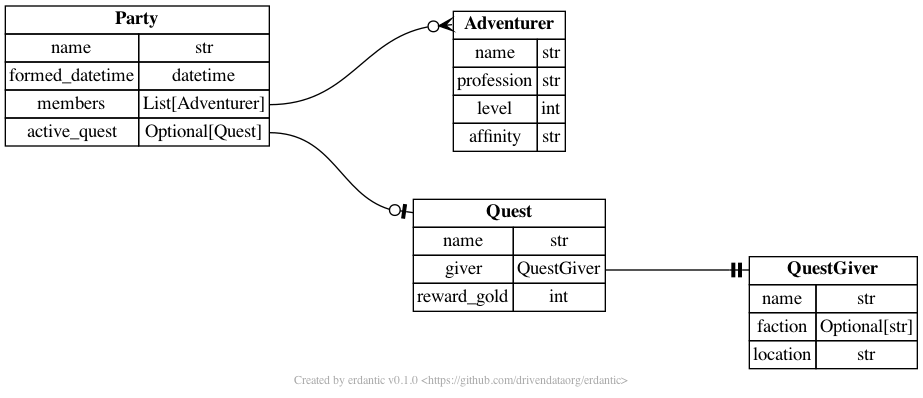

In [3]:
import erdantic as erd


diagram = erd.create(Party)
diagram

In [4]:
diagram.models

[PydanticModel(Adventurer),
 PydanticModel(Party),
 PydanticModel(Quest),
 PydanticModel(QuestGiver)]

In [5]:
diagram.edges

[Edge(source=PydanticModel(Party), source_field=<PydanticField: 'members', List[Adventurer]>, target=PydanticModel(Adventurer)),
 Edge(source=PydanticModel(Party), source_field=<PydanticField: 'active_quest', Optional[Quest]>, target=PydanticModel(Quest)),
 Edge(source=PydanticModel(Quest), source_field=<PydanticField: 'giver', QuestGiver>, target=PydanticModel(QuestGiver))]

You can use the `draw` method to render the diagram to disk.

In [6]:
diagram.draw("pydantic.svg")

# Equivalently, use erd.draw directly from Party
# erd.draw(Party, out="pydantic.svg")

erdantic uses [Graphviz](https://graphviz.org/), a venerable open-source C library, to create the diagram. Graphviz uses the [DOT language](https://graphviz.org/doc/info/lang.html) for describing graphs. You use the `to_dot` method to get the DOT representation as a string. 

In [7]:
print(diagram.to_dot())

# Equivalently, use erd.to_dot directly from Party
assert diagram.to_dot() == erd.to_dot(Party)

digraph "Entity Relationship Diagram" {
	graph [fontcolor=gray66,
		fontsize=9,
		label="Created by erdantic v0.1.0 <https://github.com/drivendataorg/erdantic>",
		nodesep=0.5,
		rankdir=LR,
		ranksep=1.5
	];
	node [fontsize=14,
		label="\N",
		shape=plain
	];
	Adventurer	[label=<<table border="0" cellborder="1" cellspacing="0"><tr><td port="_root" colspan="2"><b>Adventurer</b></td></tr><tr><td>name</td><td port="name">str</td></tr><tr><td>profession</td><td port="profession">str</td></tr><tr><td>level</td><td port="level">int</td></tr><tr><td>affinity</td><td port="affinity">str</td></tr></table>>];
	Party	[label=<<table border="0" cellborder="1" cellspacing="0"><tr><td port="_root" colspan="2"><b>Party</b></td></tr><tr><td>name</td><td port="name">str</td></tr><tr><td>formed_datetime</td><td port="formed_datetime">datetime</td></tr><tr><td>members</td><td port="members">List[Adventurer]</td></tr><tr><td>active_quest</td><td port="active_quest">Optional[Quest]</td></tr></table>>];
	Pa